In [9]:
import mlx.core as mx
import mlx.nn as nn
import numpy as np
from mlx.data import datasets
from datasets_utils import cifar100

In [10]:
def get_streamed_data(data, batch_size=0, shuffled=True):
    def transform_image(x):
        return x.astype("float32") / 255.0

    buffer = data.shuffle() if shuffled else data
    stream = buffer.to_stream()
    stream = stream.key_transform("image", transform_image)
    stream = stream.batch(batch_size) if batch_size > 0 else stream
    return stream.prefetch(4, 2)

In [11]:
train_data = datasets.load_cifar100(train=True)
test_data = datasets.load_cifar100(train=False)

len(train_data), len(test_data)

(50000, 10000)

In [12]:
import time
np.random.seed(int(time.time()))
mx.random.seed(int(time.time()))

batch = get_streamed_data(train_data, batch_size=1, shuffled=False)
row = next(batch)
row["image"].shape, row["label"]

((1, 32, 32, 3), array([19]))

In [13]:
image = mx.array(row["image"])
label = mx.array(row["label"])

batchnorm = nn.BatchNorm(3)
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=7, stride=1, padding=1)
conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
# x = nn.relu(conv(image))
# print(x.shape)
# y = nn.relu(conv1(x))
# print(y.shape)
# y = nn.relu(conv2(y))
# print(y.shape)
# y = y + x
# print(y.shape)


cattle


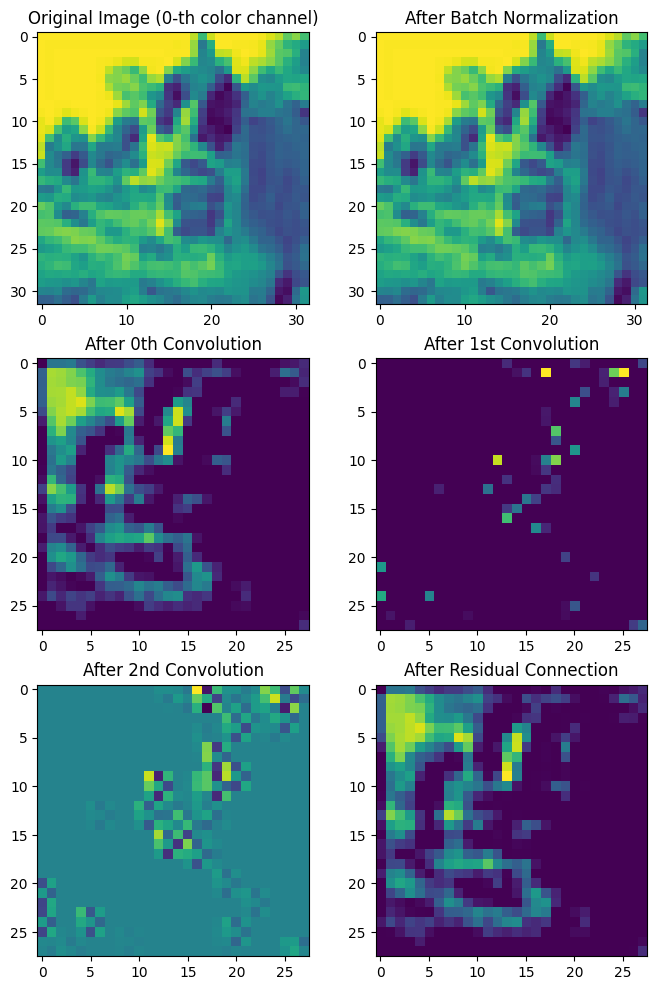

In [14]:
import matplotlib.pyplot as plt

n_cols = 2
n_rows = 3

fig = plt.figure(figsize=(n_cols * 4, n_rows * 4))
ax = fig.add_subplot(n_rows, n_cols, 1)
ax.imshow(np.array(image)[0, :, :, 0])
ax.set_title("Original Image (0-th color channel)")

ax = fig.add_subplot(n_rows, n_cols, 2)
x = batchnorm(image)
ax.imshow(np.array(x)[0, :, :, 0])
ax.set_title("After Batch Normalization")

ax = fig.add_subplot(n_rows, n_cols, 3)
x = nn.relu(conv(x))
ax.imshow(np.array(x)[0, :, :, 0])
ax.set_title("After 0th Convolution")

ax = fig.add_subplot(n_rows, n_cols, 4)
y = nn.relu(conv1(x))
ax.imshow(np.array(y)[0, :, :, 0])
ax.set_title("After 1st Convolution")

ax = fig.add_subplot(n_rows, n_cols, 5)
# y = nn.relu(conv2(y))
y = conv2(y)
ax.imshow(np.array(y)[0, :, :, 0])
ax.set_title("After 2nd Convolution")

ax = fig.add_subplot(n_rows, n_cols, 6)
y = nn.relu(y + x)
ax.imshow(np.array(y)[0, :, :, 0])
ax.set_title("After Residual Connection")

print(cifar100.labels[label.item()])